# A Neural Network in 11 lines of Python

http://www.kdnuggets.com/2015/10/neural-network-python-tutorial.html

A neural network trained with backpropagation is attempting to use input to predict output.

<table style="float:left">
    <tr>
        <th colspan=3>Inputs (X)</th>
        <th>Output (y)</th>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
    </tr>    
    <tr>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>    
</table>
<img src="layers.png"  style="width: 500px">

In [10]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'

%matplotlib inline

from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

## Sigmoid function

In [11]:
# sigmoid function
def nonlin(x, deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x)) 

A sigmoid function maps any value to a value between 0 and 1. We use it to convert numbers to probabilities. It also has several other desirable properties for training neural networks.


<img src="sigmoid.png">

In [12]:
def train(num_iterations):
    # input dataset
    X = np.array([ [0,0,1],
        [0,1,1],
        [1,0,1],
        [1,1,1] ]) 

    # output dataset
    y = np.array([[0,0,1,1]]).T 

    # seed random numbers to make calculation deterministic (just a good practice)
    np.random.seed(1) 

    # initialize weights randomly with mean 0
    weight_0 = 2*np.random.random((3,1)) - 1 

    iterations = []
    errors = []

    for iter in range(num_iterations): 

        # forward propagation
        layer_0 = X
        layer_1 = nonlin(np.dot(layer_0, weight_0)) 

        # how much did we miss?
        layer_1_error = y - layer_1

        # multiply how much we missed by the
        # slope of the sigmoid at the values in layer_1
        layer_1_delta = layer_1_error * nonlin(layer_1,True)

        # update weights
        weight_0 += np.dot(layer_0.T,layer_1_delta) 

        # capture results so we can plot them
        iterations.append({
            '001': layer_1[0][0],
            '011': layer_1[1][0],
            '101': layer_1[2][0],
            '111': layer_1[3][0]
        })
        errors.append({
            '001': layer_1_delta[0][0],
            '011': layer_1_delta[1][0],
            '101': layer_1_delta[2][0],
            '111': layer_1_delta[3][0]
        })

    print("Output After Training:\n", layer_1)        
    fig, axs = plt.subplots(1,2, figsize=[20,5])
    pd.DataFrame.from_dict(iterations).plot(ax=axs[0], title='Predictions by iteration')
    pd.DataFrame.from_dict(errors).plot(ax=axs[1], title='Error by iteration')

## Looking inside the network

Output After Training:
 [[ 0.00679672]
 [ 0.00553614]
 [ 0.99548516]
 [ 0.99445583]]


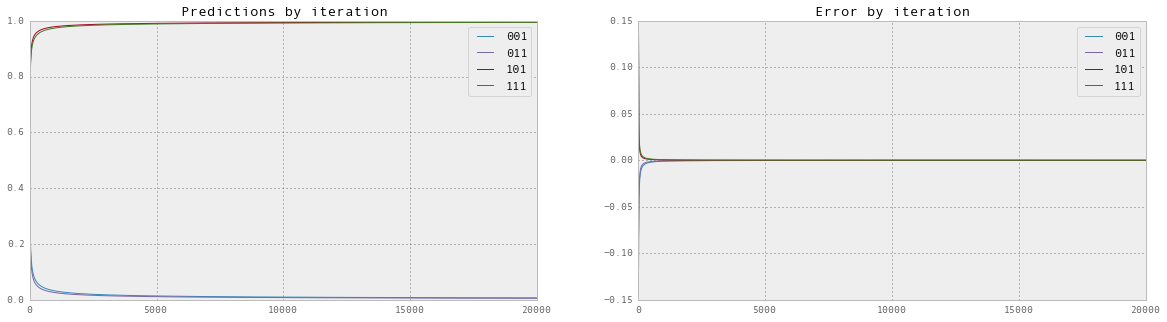

In [13]:
interact(train, num_iterations=widgets.IntText(min=1,max=10000,step=5,value=10, description='Iterations:'));